In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
url = 'C:\\Users\\Neha\\Downloads\\archive\\diabetes.csv'
df = pd.read_csv(url)

In [3]:
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().values.any()

False

In [6]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Text(0.5, 1.0, 'Distribution of Glucose')

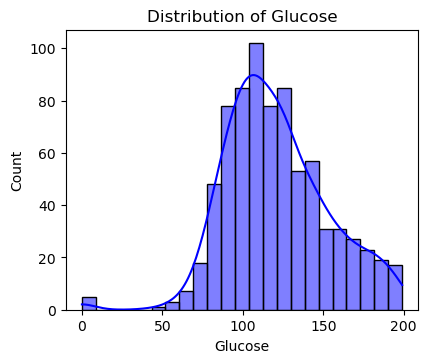

In [7]:
plt.figure(figsize=(10, 8))

# Histogram for Glucose Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

Text(0.5, 1.0, 'Age V/s Outcome')

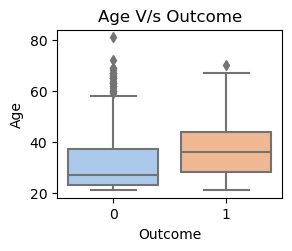

In [8]:
plt.subplot(2, 2, 2)
sns.boxplot(x='Outcome', y='Age', data=df, palette='pastel')
plt.title('Age V/s Outcome')

Text(0.5, 1.0, 'BMI V/s Outcome')

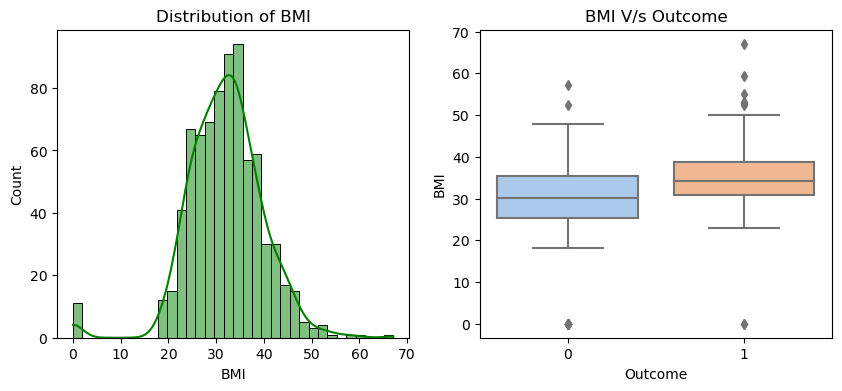

In [9]:
# Histogram for BMI
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, color='green')
plt.title('Distribution of BMI')

# Boxplot for BMI vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome', y='BMI', data=df, palette='pastel')
plt.title('BMI V/s Outcome')




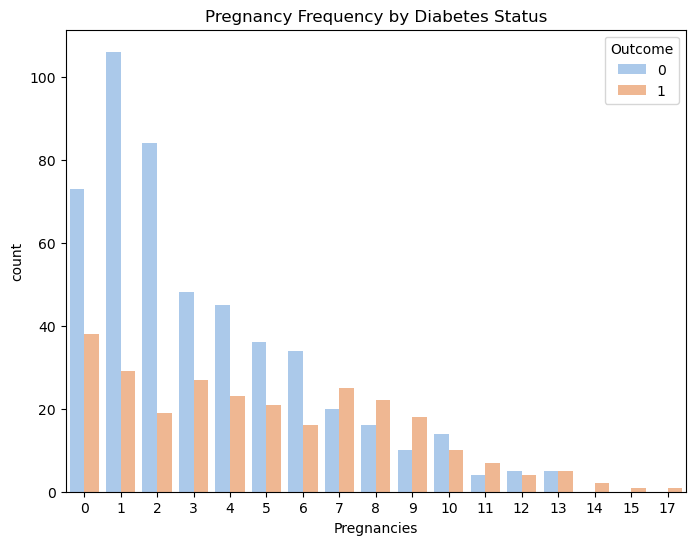

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='pastel')
plt.title('Pregnancy Frequency by Diabetes Status')
plt.show()

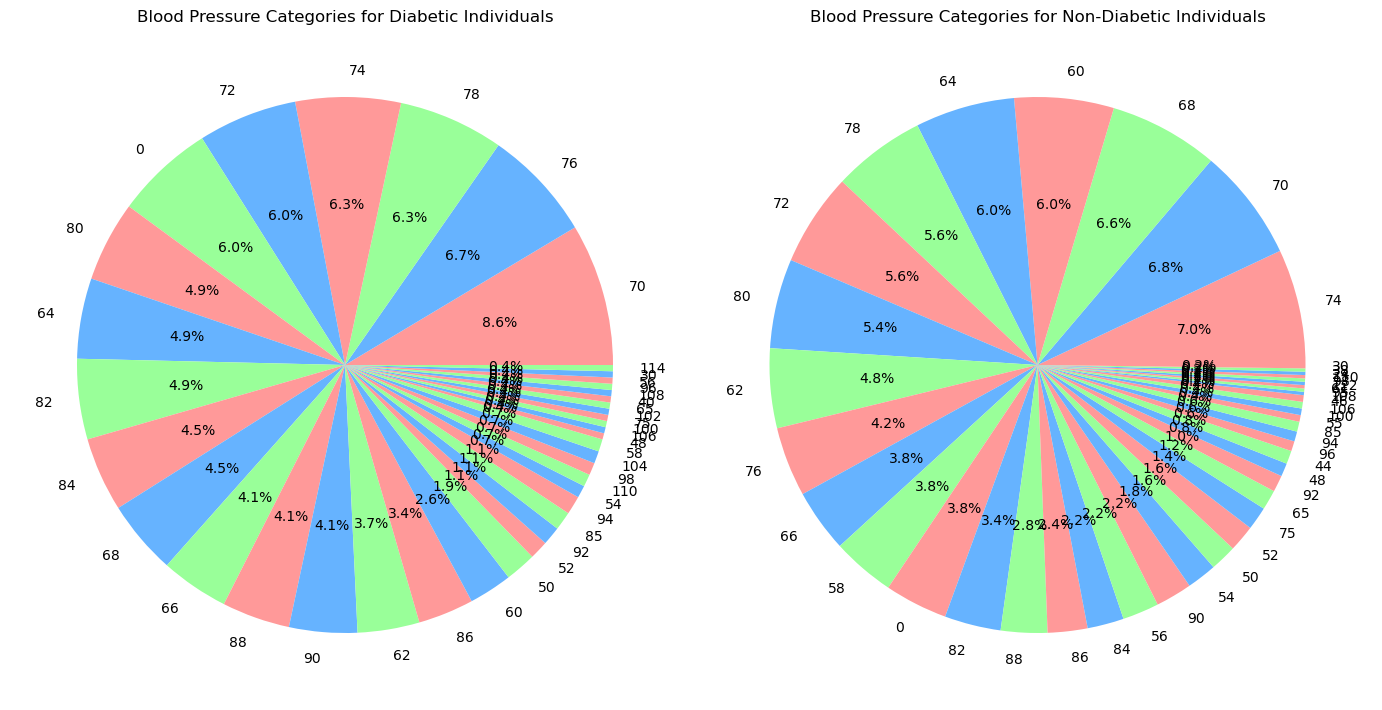

In [11]:
# Relation between BP and Diabetes
bp_levels_diabetic = df[df['Outcome'] == 1]['BloodPressure'].value_counts()
bp_levels_non_diabetic = df[df['Outcome'] == 0]['BloodPressure'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for Diabetic individuals
axes[0].pie(bp_levels_diabetic, labels=bp_levels_diabetic.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Blood Pressure Categories for Diabetic Individuals')

# Plot for Non-Diabetic individuals
axes[1].pie(bp_levels_non_diabetic, labels=bp_levels_non_diabetic.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axes[1].set_title('Blood Pressure Categories for Non-Diabetic Individuals')

plt.tight_layout()
plt.show()


In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Feature Engineering
def categorize_insulin_level(insulin):
    if insulin < 50:
        return 'Low'
    elif insulin >= 50 and insulin < 200:
        return 'Normal'
    else:
        return 'High'

X_train['InsulinLevel'] = X_train['Insulin'].apply(categorize_insulin_level)
X_test['InsulinLevel'] = X_test['Insulin'].apply(categorize_insulin_level)


In [15]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
334            1       95             60             18       58  23.9   
139            5      105             72             29      325  36.9   
485            0      135             68             42      250  42.3   
547            4      131             68             21      166  33.1   
18             1      103             30             38       83  43.3   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age InsulinLevel  
334                     0.260   22       Normal  
139        

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
# One-Hot Encoding for 'InsulinLevel'
X_train = pd.get_dummies(X_train, columns=['InsulinLevel'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['InsulinLevel'], drop_first=True)

In [18]:

from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Model Selection and Development
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

trained_models = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[model_name] = model

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Hyperparameter Tuning
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}
best_models = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_

In [21]:
# Displaying the hyperparameters for each model
for model_name, best_model in best_models.items():
    print(f"Best Hyperparameters for {model_name}:")
    print(best_model)
    print()

Best Hyperparameters for Logistic Regression:
LogisticRegression(C=1, max_iter=1000)

Best Hyperparameters for Random Forest:
RandomForestClassifier(n_estimators=50)

Best Hyperparameters for Support Vector Machine:
SVC(C=0.01, kernel='linear')



In [22]:
# Cross-Validation

cv_metrics = {}

for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_metrics[model_name] = cv_scores.mean()

# Displaying cross-validation results
for model_name, cv_score in cv_metrics.items():
    print(f"{model_name} Cross-Validation Accuracy: {cv_score}")

Logistic Regression Cross-Validation Accuracy: 0.7764797507788161
Random Forest Cross-Validation Accuracy: 0.7745759778470058
Support Vector Machine Cross-Validation Accuracy: 0.7802526825891312


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Add this line
# Model Evaluation
metrics = {}

for model_name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


In [24]:
# Displaying the evaluation metrics
for model_name, metric in metrics.items():
    print(f"{model_name} Metrics:")
    print(metric)
    print()

Logistic Regression Metrics:
{'Accuracy': 0.7229437229437229, 'Precision': 0.6, 'Recall': 0.6, 'F1 Score': 0.6}

Random Forest Metrics:
{'Accuracy': 0.7272727272727273, 'Precision': 0.6049382716049383, 'Recall': 0.6125, 'F1 Score': 0.6086956521739131}

Support Vector Machine Metrics:
{'Accuracy': 0.7402597402597403, 'Precision': 0.6388888888888888, 'Recall': 0.575, 'F1 Score': 0.6052631578947367}



In [25]:
# Function for calculating composite score:
def calculate_composite_score(metrics):
   # Can chnage weights accordingly
    weights = {'Accuracy': 0.4, 'Precision': 0.3, 'Recall': 0.2, 'F1 Score': 0.1}

    # Calculate the composite score
    composite_score = sum(weights[metric] * value for metric, value in metrics.items())
    
    return composite_score

# Calculate composite scores for each model
composite_scores = {model_name: calculate_composite_score(metric_values) for model_name, metric_values in metrics.items()}

# Find the model with the highest composite score
best_model = max(composite_scores, key=composite_scores.get)

# Print the best model
print(f"The best model is: {best_model}")


The best model is: Support Vector Machine
